# Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [49]:
df = pd.read_csv("../../data/raw/data-set.csv")

## General analysis

In [3]:
df.head()

,subscriber,income,age,var1,gender,house_type,lastVisit,product02
0,1,118239.80,74.32310,1.216512,f,OWNER,1/1/2012 2:09,Nee
1,2,348760.40,45.86138,3.672188,f,OWNER,1/1/2012 14:03,Ja
2,3,96111.34,43.18818,0.578956,f,OWNER,1/1/2012 23:58,Nee
3,4,73818.17,43.32941,-0.129441,m,RENTAL,1/2/2012 3:51,Ja
4,5,36469.51,34.87954,-0.127675,m,RENTAL,1/2/2012 13:50,Nee


In [4]:
df.shape

(9524, 8)

In [5]:
df.dtypes

subscriber      int64
income        float64
age           float64
var1          float64
gender         object
house_type     object
lastVisit      object
product02      object
dtype: object

In [6]:
df.describe()

,subscriber,income,age,var1
count,9524.000000,8966.000000,8975.000000,8952.000000
mean,4762.500000,122301.927841,49.043465,-0.105003
std,2749.486316,89007.507823,16.288764,1.480915
min,1.000000,985.849800,18.209650,-17.140300
25%,2381.750000,52975.740000,36.247210,-0.853022
50%,4762.500000,101522.700000,47.870090,-0.117858
75%,7143.250000,170981.975000,59.644960,0.679146
max,9524.000000,632975.000000,101.095400,13.600780


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524 entries, 0 to 9523
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subscriber  9524 non-null   int64  
 1   income      8966 non-null   float64
 2   age         8975 non-null   float64
 3   var1        8952 non-null   float64
 4   gender      8969 non-null   object 
 5   house_type  8978 non-null   object 
 6   lastVisit   9524 non-null   object 
 7   product02   9524 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 595.4+ KB


In [8]:
df.isna().sum()

subscriber      0
income        558
age           549
var1          572
gender        555
house_type    546
lastVisit       0
product02       0
dtype: int64

In [9]:
df.columns

Index(['subscriber', 'income', 'age', 'var1', 'gender', 'house_type',
       'lastVisit', 'product02'],
      dtype='object')

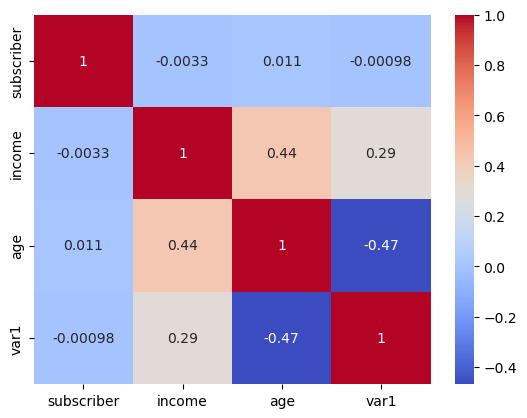

In [10]:
correlation_matrix = df[['subscriber', 'income', 'age', 'var1']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Interesting points to pursue

- income, age, var1, gender and house_type have around 550 values missing. Are those in the same rows? Is there some pattern between those?
- There is a correlation between age, var1 and income. Subscriber seems to be totally unrelated which coincides with the assumption that it's an id column. Should add the string variables to.

## Column analysis

Let's assume that subscriber is an identity column

In [11]:
df.columns

Index(['subscriber', 'income', 'age', 'var1', 'gender', 'house_type',
       'lastVisit', 'product02'],
      dtype='object')

### Income

In [12]:
df["income"].isna().sum()

558

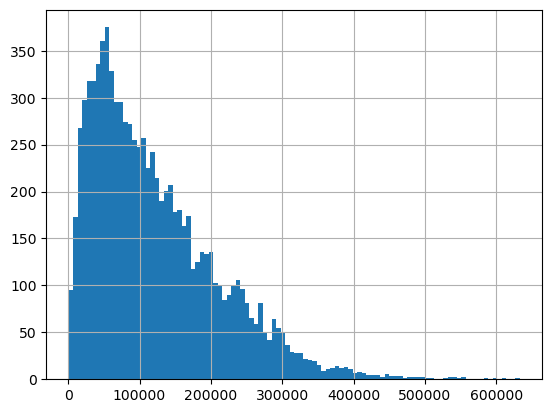

In [13]:
df["income"].hist(bins=100);

In [14]:
df["lastVisit"].min()

'1/1/2012 14:03'

Big difference between lowest 950 and highest 630_000. So maybe some income is per month and some is per year. Since the most is looks like it's yearly I assume that.
Googling sets the bijstand income to 7500 yearly in 2011. So that looks a good minimum threshhold.

In [15]:
df[df["income"] < 7_500]['income'].shape

(96,)

## age

In [16]:
df["age"].describe()

count    8975.000000
mean       49.043465
std        16.288764
min        18.209650
25%        36.247210
50%        47.870090
75%        59.644960
max       101.095400
Name: age, dtype: float64

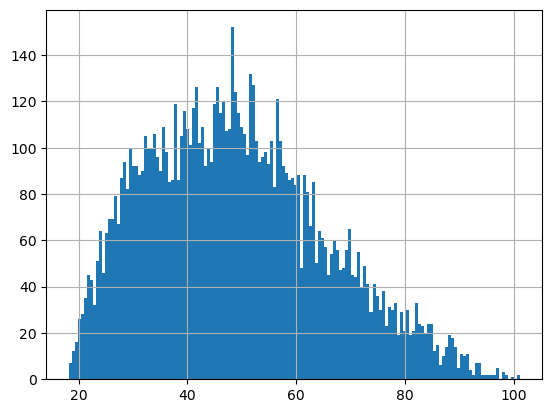

In [17]:
df["age"].hist(bins=150);

Minimum age 18 seems correct and 101 seems plausible as well. Distribution doesn't look weird either

## var1

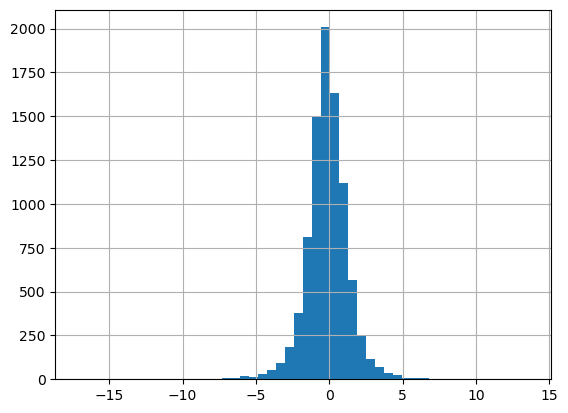

In [18]:
df['var1'].hist(bins=50);

## house_type

In [19]:
df['house_type'].value_counts(dropna=False)

house_type
RENTAL    4920
OWNER     4058
NaN        546
Name: count, dtype: int64

In [32]:
df['house_type_bin'] = df['house_type'].map({'OWNER': 1, 'RENTAL': 0})

## gender

In [20]:
df['gender'].value_counts(dropna=False)

gender
m      5073
f      3896
NaN     555
Name: count, dtype: int64

In [31]:
df['gender_bin'] = df['gender'].map({'m': 1, 'f': 0})

## lastVisit

In [21]:
df['lastVisit'].min()


'1/1/2012 14:03'

In [22]:
df['lastVisit'].max()

'9/9/2016 5:12'

In [23]:
df['lastVisit']

0          1/1/2012 2:09
1         1/1/2012 14:03
2         1/1/2012 23:58
3          1/2/2012 3:51
4         1/2/2012 13:50
              ...       
9519    11/21/2016 12:09
9520    11/21/2016 17:58
9521    11/21/2016 20:27
9522    11/21/2016 22:42
9523     11/22/2016 0:20
Name: lastVisit, Length: 9524, dtype: object

In [24]:
format = "%m/%d/%Y %H:%M"

In [25]:
df['lastVisit_dt'] = pd.to_datetime(df['lastVisit'], format=format)

In [26]:
df['lastVisit_year'] = df['lastVisit_dt'].dt.year
df['lastVisit_month'] = df['lastVisit_dt'].dt.month

updated column to datetime format for easier analysis

## product02

In [27]:
df['product02'].value_counts(dropna=False)

product02
Nee    5618
Ja     3906
Name: count, dtype: int64

Slightly imbalanced, resampling needed?

In [28]:
df['product02_bin'] = df['product02'].map({'Ja': 1, 'Nee': 0})

In [30]:
df['product02_bin'].value_counts(dropna=False)

product02_bin
0    5618
1    3906
Name: count, dtype: int64

## Colinearity analysis

In [33]:
df.head()

,subscriber,income,age,var1,gender,house_type,lastVisit,product02,lastVisit_dt,lastVisit_year,lastVisit_month,product02_bin,gender_bin,house_type_bin
0,1,118239.80,74.32310,1.216512,f,OWNER,1/1/2012 2:09,Nee,2012-01-01 02:09:00,2012,1,0,0.0,1.0
1,2,348760.40,45.86138,3.672188,f,OWNER,1/1/2012 14:03,Ja,2012-01-01 14:03:00,2012,1,1,0.0,1.0
2,3,96111.34,43.18818,0.578956,f,OWNER,1/1/2012 23:58,Nee,2012-01-01 23:58:00,2012,1,0,0.0,1.0
3,4,73818.17,43.32941,-0.129441,m,RENTAL,1/2/2012 3:51,Ja,2012-01-02 03:51:00,2012,1,1,1.0,0.0
4,5,36469.51,34.87954,-0.127675,m,RENTAL,1/2/2012 13:50,Nee,2012-01-02 13:50:00,2012,1,0,1.0,0.0


In [37]:
df_corr_numeric = df.corr(numeric_only=True)

In [42]:
df_corr_numeric['product02_bin']

subscriber         0.179381
income             0.181383
age               -0.055964
var1               0.141918
lastVisit_year     0.165539
lastVisit_month    0.072105
product02_bin      1.000000
gender_bin        -0.082059
house_type_bin     0.139515
Name: product02_bin, dtype: float64

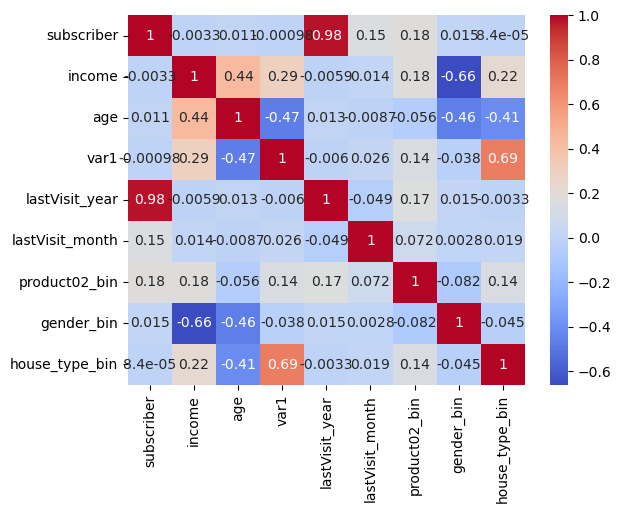

In [38]:
sns.heatmap(df_corr_numeric, annot=True, cmap='coolwarm')
plt.show()

Thoughts:
- gender and income seem correlated, that's sad but probably not relevant
- lastvisit_year and subscriber are highly correlated. Ofcourse, newer subscriptions get a higher id assuming it counts upwards
- house_type, lastVisit_year, var1, income and subscriber Id all seem to have some predictive power for product02
- Subscriber probably has predictive power since it sort of reflects the lastVisit column.

Preliminary conclusions:
So at first it seems that income, var1, lastVisit (in some form) and house_type have some predictive power. Gender seems less important although it relates to income and age quite well. But since I don't know what product02 is we should also be aware of certain ethical implications

In [52]:
df.isna().sum(axis=1).value_counts()

0    8289
2     434
3     338
1     323
4     125
5      15
Name: count, dtype: int64

In [56]:
df[df.isna().sum(axis=1)<=2]

,subscriber,income,age,var1,gender,house_type,lastVisit,product02
0,1,118239.80,74.32310,1.216512,f,OWNER,1/1/2012 2:09,Nee
1,2,348760.40,45.86138,3.672188,f,OWNER,1/1/2012 14:03,Ja
2,3,96111.34,43.18818,0.578956,f,OWNER,1/1/2012 23:58,Nee
3,4,73818.17,43.32941,-0.129441,m,RENTAL,1/2/2012 3:51,Ja
4,5,36469.51,34.87954,-0.127675,m,RENTAL,1/2/2012 13:50,Nee
...,...,...,...,...,...,...,...,...
9519,9520,79324.85,29.57617,2.261101,m,OWNER,11/21/2016 12:09,Ja
9520,9521,215149.60,46.34125,0.590807,f,OWNER,11/21/2016 17:58,Ja
9521,9522,80558.36,37.10520,-0.099423,f,RENTAL,11/21/2016 20:27,Ja
9522,9523,158810.10,65.85983,-0.263309,f,RENTAL,11/21/2016 22:42,Ja


8 columns, subscriber, product02 and lastVisit have no Nans. So 5 columns mean no information except lastVisit at all.
Since there's no column with high predictability on product02. I think atleast 3 columns excluding lastVisit are needed to be somewhat exact. 

**HARD ASSUMPTION** might need to tune this to minimum 2 columns.